In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
learning_curves = np.load('Results/DefaultExp/learning_curve.npz')
Metrics = np.load('Results/DefaultExp/Metrics.npz')

In [3]:
print(learning_curves['losses_train'], learning_curves['losses_val'])

[0.47995749 0.39510534 0.36011051 0.33627287 0.31412412 0.29640711
 0.28348362 0.27101428 0.26107262 0.25306814 0.24679065 0.24107999
 0.23466417 0.22685688 0.21290199 0.20842448 0.2011001  0.19228453
 0.16216269 0.15139638 0.14662528 0.1438686  0.13937139 0.13601078
 0.13459053] [0.3958263  0.3617972  0.3401334  0.32858085 0.31300089 0.28074045
 0.29066896 0.28722187 0.28329246 0.27062628 0.25345547 0.2482558
 0.28490194 0.24212994 0.25432978 0.25499631 0.27020706 0.26244223
 0.23541363 0.23984719 0.24196529 0.24417144 0.2487725  0.25088782
 0.25108557]


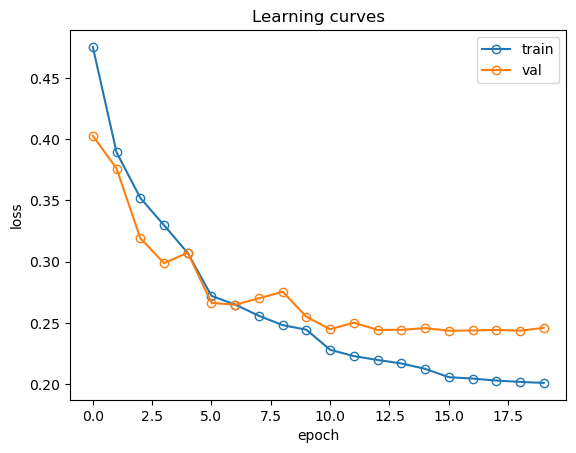

In [33]:
fig = plt.figure()

plt.plot(learning_curves['losses_train'], label='train', marker='o', fillstyle='none')
plt.plot(learning_curves['losses_val'], label='val', marker = "o", fillstyle = "none")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curves')
plt.legend()
plt.savefig("Results/DefaultExp/LearningCurve.pdf",format='pdf')
plt.show()

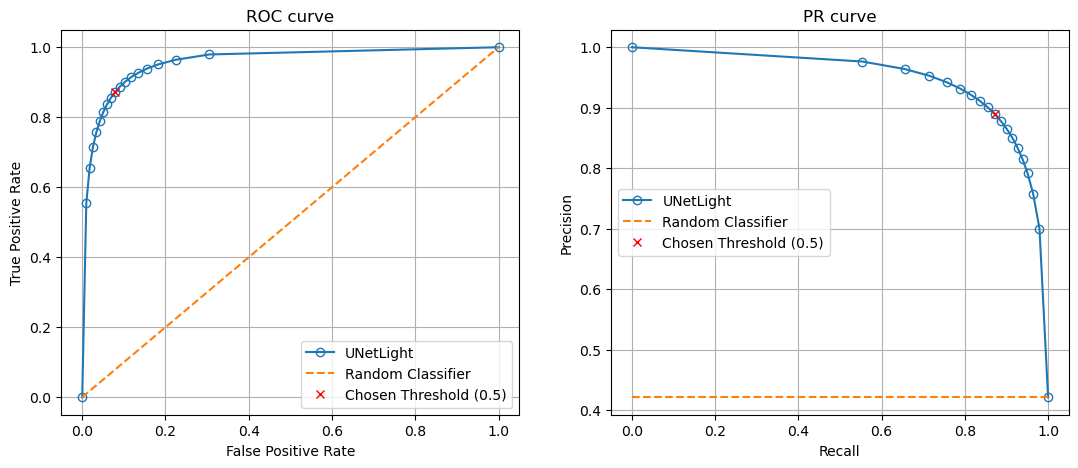

Accuracy  :  0.9003443795561143
Precision :  0.8892860539496196
Recall    :  0.8720310861473259
FPR       :  0.07904195408470083
F1 score  :  0.8805740498030609
IoU score :  0.7866300130420799
0.4213150879789218


In [ ]:
x = len(Metrics['FPR'])//2

fig = plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.plot(Metrics['FPR'], Metrics['TPR'], marker='o', fillstyle='none', label='UNetLight')
plt.plot([0,1],[0,1], '--', fillstyle = "none", label="Random Classifier")
plt.plot(Metrics['FPR'][x], Metrics['TPR'][x], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.grid()

Imbalance = Metrics['Precision'][0]
plt.subplot(1,2,2)
plt.plot(Metrics['Recall'], Metrics['Precision'], marker='o', fillstyle='none', label='UNetLight')
plt.plot([0,1],[Imbalance,Imbalance], '--', fillstyle = "none", label="Random Classifier")
plt.plot(Metrics['Recall'][x], Metrics['Precision'][x], color='red', marker='x', linestyle='', fillstyle='none', label='Chosen Threshold (0.5)')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.grid()

plt.savefig("Results/DefaultExp/ROC_PR_Curve.pdf",format='pdf')
plt.show()

print("Accuracy  : ", Metrics['Accuracy'][x])
print("Precision : ", Metrics['Precision'][x])
print("Recall    : ", Metrics['Recall'][x])
print("FPR       : ", Metrics['FPR'][x])
print("F1 score  : ", Metrics['F1'][x])
print("IoU score : ", Metrics['IoU'][x])
print("Imbalance : ", Imbalance)